# Pre-lecture HW 07 - Cayden Wong 2024/11/09

### 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

Session Link for Q1: https://chatgpt.com/share/672fb7d2-5740-8012-b4e9-4014a75ea291

1) the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former  
Simple linear regression models the relationship between a single predictor variable and an outcome variable. Multiple linear regression, as the name implies, models the relationship between multiple predictor variables and an outcome variable. Multiple linear regression is beneficial for analysing more complex relationships involving multiple predictor variables to provide evidence against more specific and complex hypotheses.

2) the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms  
In simple linear regression, using a continuous variable models a straight line relationship between the predictor and outcome variable, where $\beta_1$ acts as the slope coefficient in the linear form $Y_i = \beta_0 + \beta_1(continuous)$. When using an indicator variable instead, the regression model models a binary relationship between the predictor variable and the outcome variable, where activating the indicator variable adds a constant change to the value of the outcome variable. In summary, continuous variables affect the slope of the graph whereas indicator variables affect the y-intercept of the model in the linear form $Y_i = \beta_0 + \beta_1 1(indicator)$.

3) the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)  
Introducing an indicator variable alongside a continuous variable causes the regression model to split the data into two linear forms according to the value of the indicator variable. Effectively, the model creates two parallel lines, separated by a distance according to the coefficient attached to the indicator variable.

4) the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form  
Adding an interaction between a continuous and indicator variable creates two distinct linear equations which variable slope coefficients and y-intercepts depending on the value of the indicator variable. Toggling the variable on/off changes both the slope coefficient and y-intercept of the model in the linear form $Y_i = \beta_0 + \beta_{A_0} 1(predictor A) + x_i(\beta_1 + \beta_{A_1} 1(predictor A))$

5) the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes  
When modeling an indicator variable with non-binary categorical data, the model represents several unique y-intercepts that change depending on which indicator category is activated. This created several groups of normally distributed data around different heights on a plot, since the value of the indicator variable will directly change the predictor variable by a constant value. $Y_i = \beta_0 + \beta_B 1_{[x_i = "B"]}(x_i) + \beta_C 1_{[x_i = "C"]}(x_i) + ...$

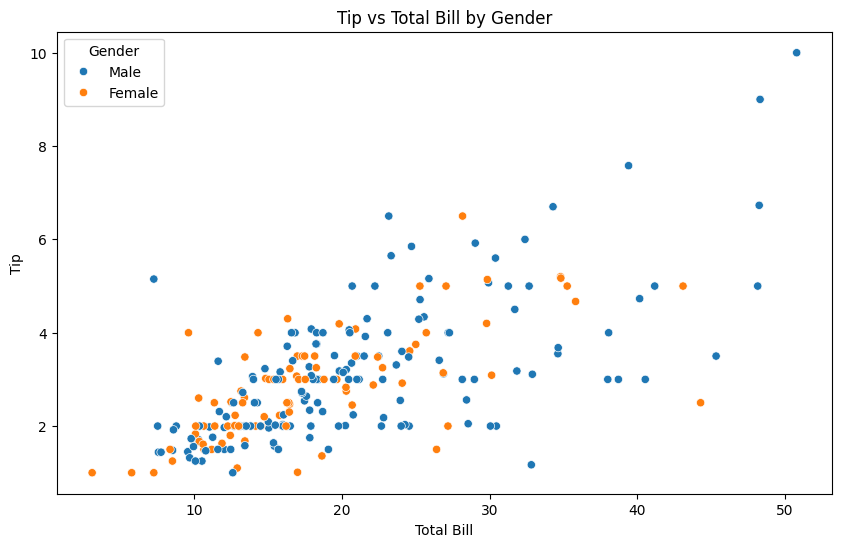

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     67.43
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.16e-31
Time:                        20:06:31   Log-Likelihood:                -350.37
No. Observations:                 244   AIC:                             708.7
Df Residuals:                     240   BIC:                             722.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

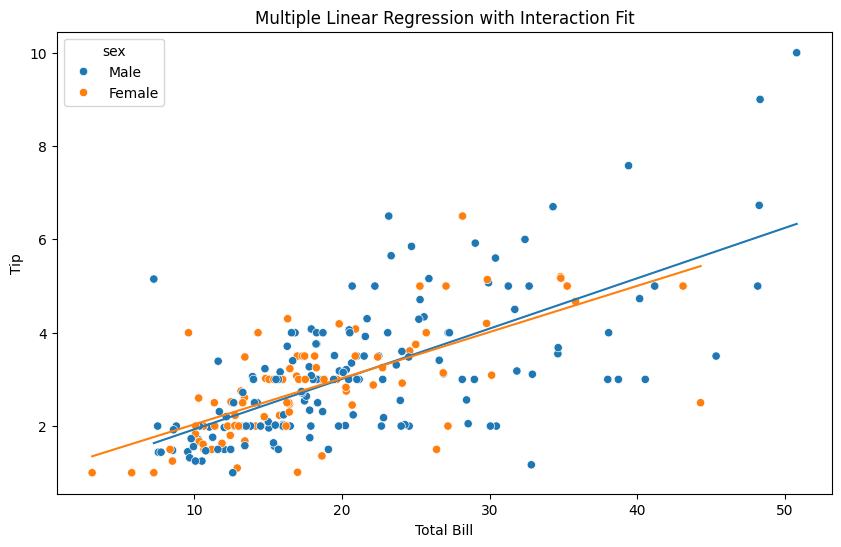

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the dataset
tips = sns.load_dataset("tips")

# Create an indicator variable for gender (1 for Female, 0 for Male)
tips['is_female'] = tips['sex'].apply(lambda x: 1 if x == 'Female' else 0)

# Scatter plot of tip vs total_bill, colored by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs Total Bill by Gender')
plt.legend(title='Gender')
plt.show()

# Multiple Linear Regression with interaction between 'total_bill' and 'is_female'
model = smf.ols('tip ~ total_bill * is_female', data=tips).fit()

# Print the model summary
print(model.summary())

# Plot the regression lines for each group (Male and Female)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

# Predict the values for the two groups
tips['predicted_tip'] = model.predict()

# Plot regression lines
sns.lineplot(x='total_bill', y='predicted_tip', hue='sex', data=tips, legend=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Multiple Linear Regression with Interaction Fit')
plt.show()


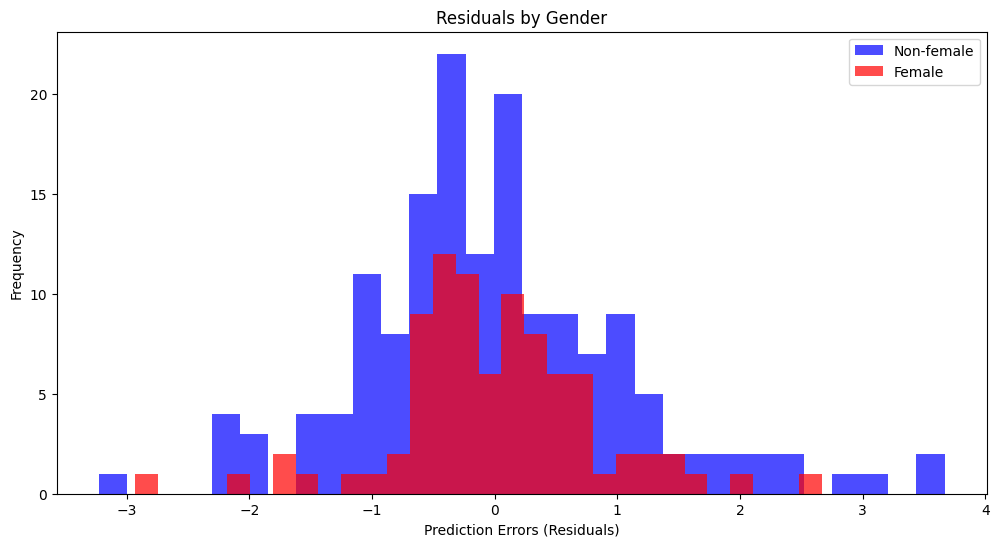

In [2]:
# Calculate prediction errors
errors = tips['tip'] - model.predict()

# Split errors by the 'is_usa' indicator
errors_female = errors[tips['is_female'] == 1]
errors_non_female = errors[tips['is_female'] == 0]

# Plot histograms for each group
plt.figure(figsize=(12, 6))

# Histogram for USA cars
plt.hist(errors_non_female, bins=30, alpha=0.7, label='Non-female', color='blue')
# Histogram for non-USA cars
plt.hist(errors_female, bins=30, alpha=0.7, label='Female', color='red')

plt.xlabel('Prediction Errors (Residuals)')
plt.ylabel('Frequency')
plt.title('Residuals by Gender')
plt.legend()
plt.show()


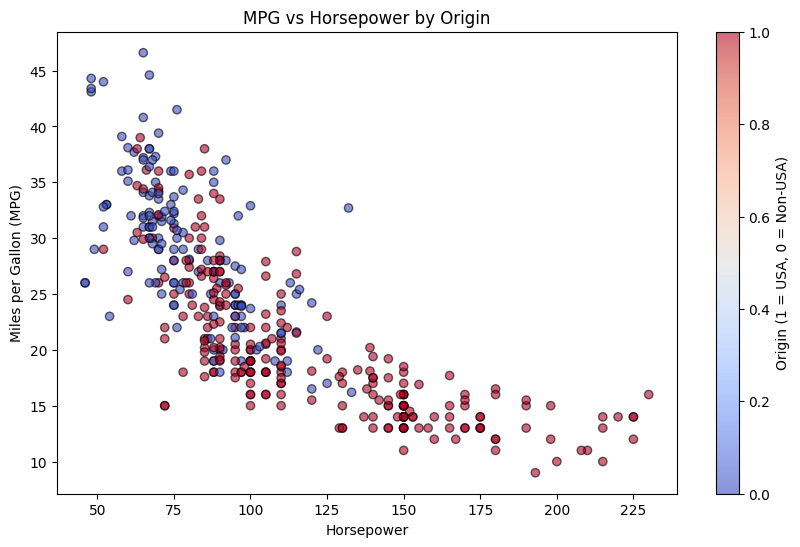

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.51e-93
Time:                        20:06:33   Log-Likelihood:                -1142.7
No. Observations:                 392   AIC:                             2293.
Df Residuals:                     388   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            47.3407      1.62

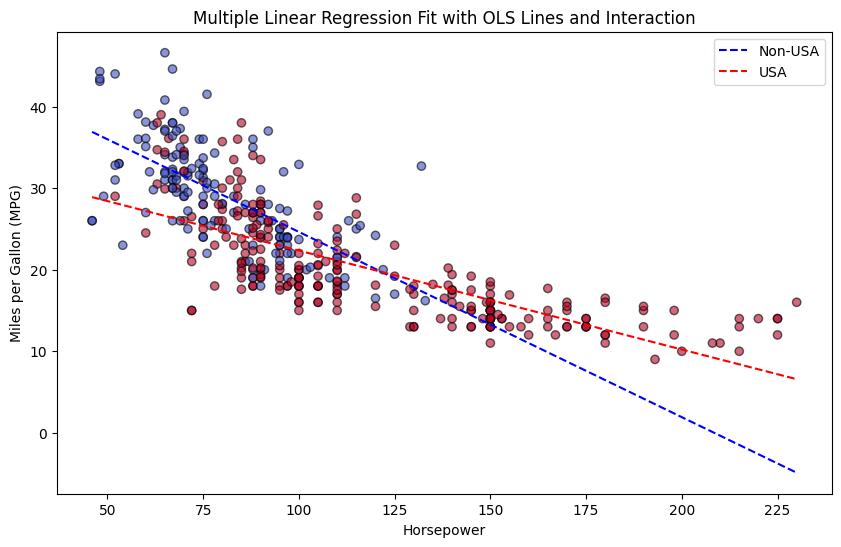

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the dataset
mpg = sns.load_dataset("mpg").dropna()

# Convert 'origin' into indicator (dummy) variables for USA and non-USA cars
mpg['is_usa'] = mpg['origin'].apply(lambda x: 1 if x == 'usa' else 0)

# Scatter plot of mpg vs horsepower, colored by origin
plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], c=mpg['is_usa'], cmap='coolwarm', edgecolor='k', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('MPG vs Horsepower by Origin')
plt.colorbar(label='Origin (1 = USA, 0 = Non-USA)')
plt.show()

# Multiple Linear Regression with interaction term between 'is_usa' and 'horsepower'
model = smf.ols('mpg ~ is_usa * horsepower', data=mpg).fit()

# Print the model summary
print(model.summary())

# Plot the fitted lines for is_usa = 0 and is_usa = 1
plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], c=mpg['is_usa'], cmap='coolwarm', edgecolor='k', alpha=0.6)

# Define x values for drawing the OLS lines
hp_values = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)

# Calculate the fitted line for non-USA (is_usa = 0)
predicted_mpg_non_usa = model.params['Intercept'] + model.params['horsepower'] * hp_values
plt.plot(hp_values, predicted_mpg_non_usa, label='Non-USA', color='blue', linestyle='--')

# Calculate the fitted line for USA (is_usa = 1)
predicted_mpg_usa = (
    model.params['Intercept'] 
    + model.params['is_usa'] 
    + (model.params['horsepower'] + model.params['is_usa:horsepower']) * hp_values
)
plt.plot(hp_values, predicted_mpg_usa, label='USA', color='red', linestyle='--')

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Multiple Linear Regression Fit with OLS Lines and Interaction')
plt.legend()
plt.show()


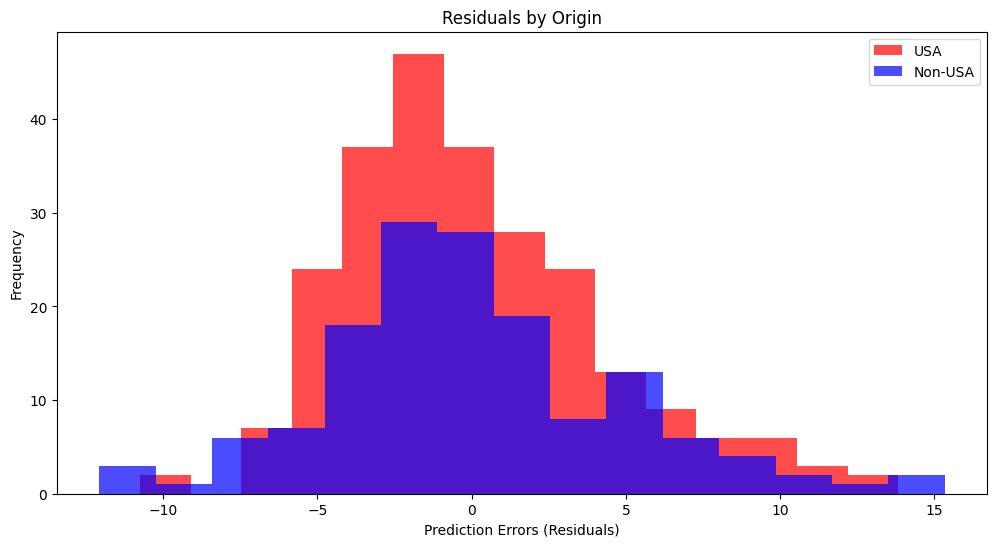

In [4]:
# Calculate prediction errors
errors = mpg['mpg'] - model.predict()

# Split errors by the 'is_usa' indicator
errors_usa = errors[mpg['is_usa'] == 1]
errors_non_usa = errors[mpg['is_usa'] == 0]

# Plot histograms for each group
plt.figure(figsize=(12, 6))

# Histogram for USA cars
plt.hist(errors_usa, bins=15, alpha=0.7, label='USA', color='red')
# Histogram for non-USA cars
plt.hist(errors_non_usa, bins=15, alpha=0.7, label='Non-USA', color='blue')

plt.xlabel('Prediction Errors (Residuals)')
plt.ylabel('Frequency')
plt.title('Residuals by Origin')
plt.legend()
plt.show()


### 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

Session link for Q2: https://chatgpt.com/share/672fc363-5490-8012-8d29-f1da9b3ee681

> Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to an interaction effect between the two advertising mediums.

In this example, the predictor variables will be the amount's of money spent on advertising for TV and for Online platforms. The single outcome variable will the total number of sales. We can measure the interaction between sales and the TV advertising budget using the equation $Y_i = \beta_0 + \beta_1 (x_{i_{\text{television budget}}})$ and the interaction between sales and online advertising through the equation $Y_i = \beta_0 + \beta_1 (x_{i_{\text{online budget}}})$

1) Explain how to use these two formulas to make predictions of the outcome, and give a high level explanation in general terms of the difference between predictions from the models with and without the interaction  

We can use the add the two formulas together to get a general prediction of the sales outcome assuming there is no interaction between the budget of the two types of advertising: $Y_i = \beta_0 + \beta_{TV} tv_i + \beta_{ON} on_i$. Assuming there is interaction, we can modify our equations to the following $Y_i = \beta_0 + \beta_{TV} tv_i + \beta_{ON} on_i + \beta_{TV + ON} (tv_i \times on_i)$. With this model, we have another parameter which can quantify the effect of the relationship between the amount spent on tv and on

2) Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)

To update our model to consider the budgets as high and low instead of continuous variables, we can convert them to indicator variables, where 1 represents high budget and 0 represents low budget. $Y_i = \beta_0 + \beta_{TV} 1_{["TV"="high"]}(tv_i) + \beta_{ON} 1_{["ON"="high"]}(on_i) + \beta_{TV + ON} 1_{["TV"="high"]}(tv_i) \times 1_{["ON"="high"]}(on_i)$

Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        20:06:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0

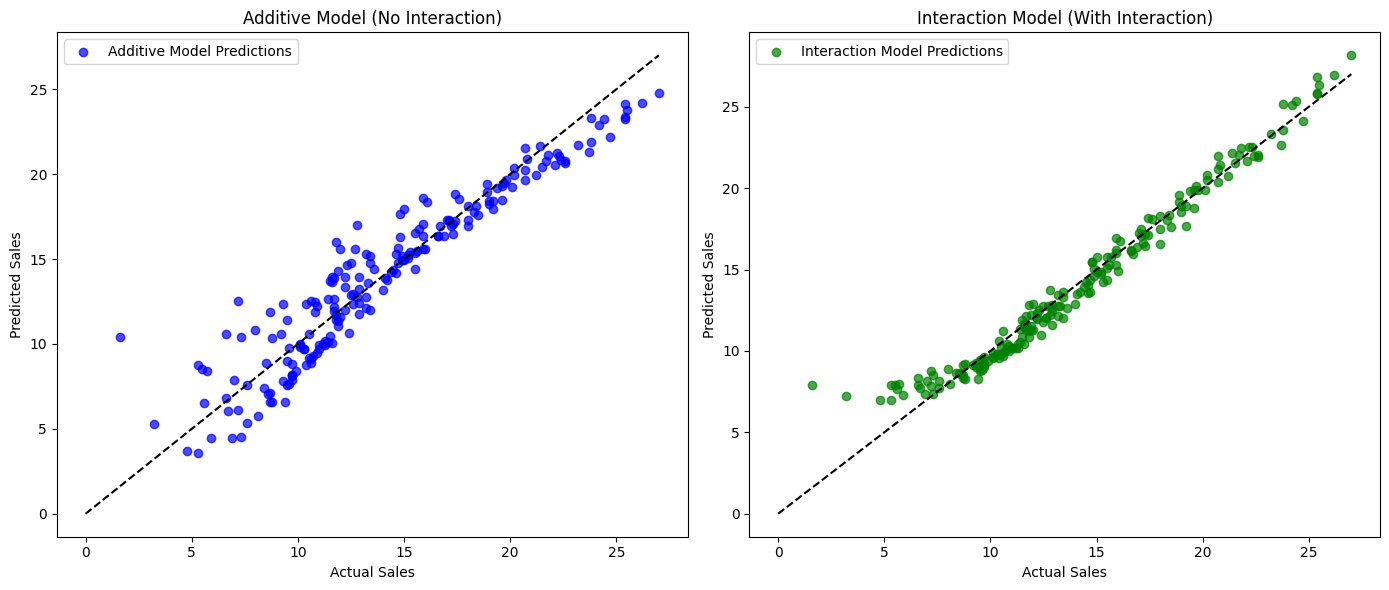

In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("advertising.csv")

# 1. Fit the additive model (no interaction term)
# Using smf.ols with a formula string
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()
print("Additive Model Summary:")
print(model_additive.summary())

# 2. Fit the interaction (synergistic) model
# Including the interaction term in the formula
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()
print("\nSynergistic Model (with Interaction) Summary:")
print(model_interaction.summary())

# 3. Predictions and plotting the results
df['additive_pred'] = model_additive.predict(df)
df['interaction_pred'] = model_interaction.predict(df)

# Scatter plot with predictions from both models
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs. additive model predictions
plt.subplot(1, 2, 1)
plt.scatter(df['Sales'], df['additive_pred'], alpha=0.7, color='blue', label='Additive Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Additive Model (No Interaction)")
plt.legend()

# Scatter plot of actual vs. interaction model predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Sales'], df['interaction_pred'], alpha=0.7, color='green', label='Interaction Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Interaction Model (With Interaction)")
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.graph_objs as go
import numpy as np

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("Advertising.csv")

# 1. Fit the additive model (no interaction term)
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()

# 2. Fit the interaction (synergistic) model
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()

# 3. Generate a grid of values for TV and Radio to predict Sales over a surface
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 50)
radio_range = np.linspace(df['Radio'].min(), df['Radio'].max(), 50)
TV, Radio = np.meshgrid(tv_range, radio_range)
grid = pd.DataFrame({'TV': TV.ravel(), 'Radio': Radio.ravel()})

# Predict Sales for each model on this grid
grid['additive_pred'] = model_additive.predict(grid)
grid['interaction_pred'] = model_interaction.predict(grid)

# Reshape predictions to match the shape of the TV and Radio grid
Additive_Sales = grid['additive_pred'].values.reshape(TV.shape)
Interaction_Sales = grid['interaction_pred'].values.reshape(TV.shape)

# 4. Create interactive 3D plot with Plotly
fig = go.Figure()

# Add scatter plot for actual data points
fig.add_trace(go.Scatter3d(
    x=df['TV'], y=df['Radio'], z=df['Sales'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.7),
    name='Actual Sales'
))

# Add surface for the Additive Model
fig.add_trace(go.Surface(
    x=tv_range, y=radio_range, z=Additive_Sales,
    colorscale='Blues', opacity=0.5,
    name='Additive Model'
))

# Add surface for the Interaction Model
fig.add_trace(go.Surface(
    x=tv_range, y=radio_range, z=Interaction_Sales,
    colorscale='Greens', opacity=0.5,
    name='Interaction Model'
))

# Update layout for better visualization
fig.update_layout(
    title="3D Interactive Plot of Sales Predictions",
    scene=dict(
        xaxis_title="TV",
        yaxis_title="Radio",
        zaxis_title="Sales"
    ),
    legend=dict(x=0, y=1),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        20:06:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0

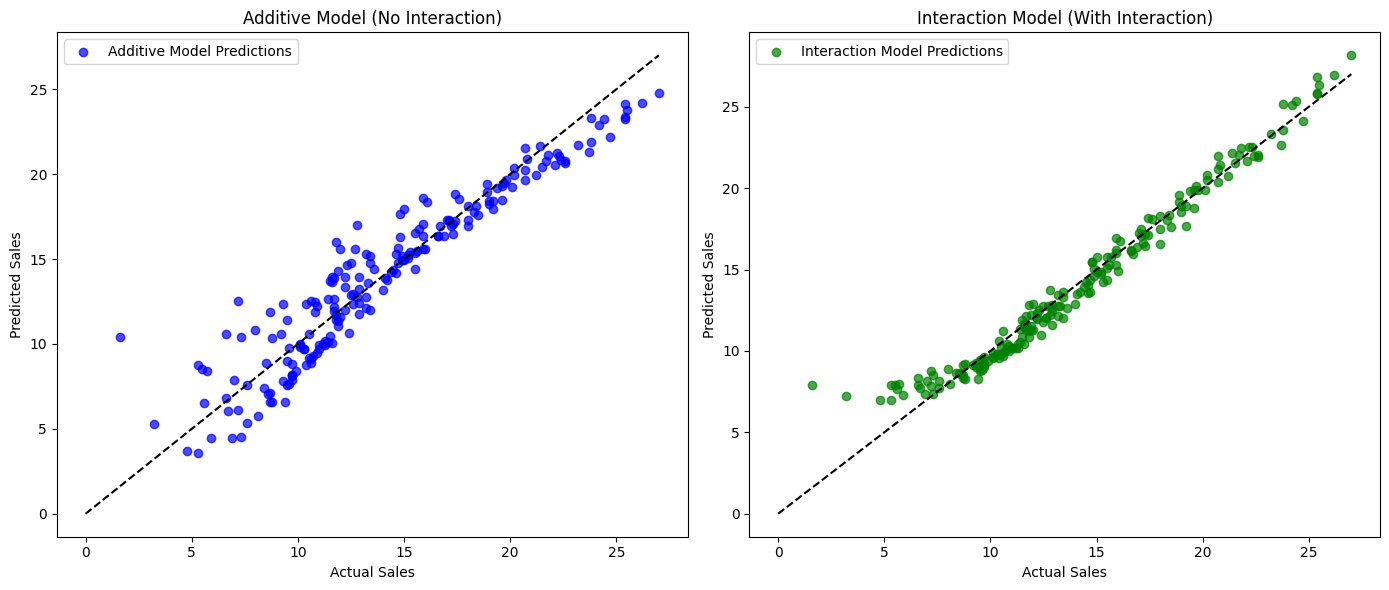

In [7]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("advertising.csv")

# 1. Fit the additive model (no interaction term)
# Using smf.ols with a formula string
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()
print("Additive Model Summary:")
print(model_additive.summary())

# 2. Fit the interaction (synergistic) model
# Including the interaction term in the formula
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()
print("\nSynergistic Model (with Interaction) Summary:")
print(model_interaction.summary())

# 3. Predictions and plotting the results
df['additive_pred'] = model_additive.predict(df)
df['interaction_pred'] = model_interaction.predict(df)

# Scatter plot with predictions from both models
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs. additive model predictions
plt.subplot(1, 2, 1)
plt.scatter(df['Sales'], df['additive_pred'], alpha=0.7, color='blue', label='Additive Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Additive Model (No Interaction)")
plt.legend()

# Scatter plot of actual vs. interaction model predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Sales'], df['interaction_pred'], alpha=0.7, color='green', label='Interaction Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Interaction Model (With Interaction)")
plt.legend()

plt.tight_layout()
plt.show()


### 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey
EDIT: No, you probably actually care about CATEGORICAL or BINARY outcomes rather than CONTINUOUS outcomes... so you'll probably not actually want to do multiple linear regression and instead do logistic regression or multi-class classification. Okay, I'll INSTEAD guide you through doing logistic regression.

for an additive specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables and a CONTINUOUS OUTCOME varaible
This would have been easy to do following the instructions here. A good alternative analagous presentation for logistic regression I just found seems to be this one from a guy named Andrew. He walks you through the logit alternative to OLS given here.
Logistic is for a binary outcome so go see this piazza post describing how you can turn any non-binary categorical variable into a binary variable.
Then instead do this problem like this: catogorical outcome turned into a binary outcome for logistic regression and then use any additive combination of a couple of continuous, binary, and/or categorical variables as predictor variables.
##### Here's an example of how you can do this

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()


Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        13:17:06   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""


for a synertistic interaction specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables

But go ahead and AGAIN do this for logistic regression like above.
Things are going to be A LOT simpler if you restrict yourself to continuous and/or binary predictor variables. But of course you could use the same trick again to treat any categorical variable as just a binary variable (in the manner of that piazza post.
and interpretively explain your linear forms and how to use them to make predictions

Look, intereting logistic regression IS NOT as simple as interpreting multivariate linear regression. This is because it requires you to understand so-called log odds and that's a bit tricky.
So, INSTEAD, just intepret you logistic regression models AS IF they were multivariate linear regression model predictions, okay?
and interpret the statistical evidence associated with the predictor variables for each of your model specifications

Yeah, you're going to be able to do this based on the .fit().summary() table just like with multiple linear regression... now you might be starting to see how AWESOME all of this stuff we're doing is going to be able to get...
and finally use plotly to visualize the data with corresponding "best fit lines" for a model with continuous plus binary indicator specification under both (a) additive and (b) synergistic specifications of the linear form (on separate figures), commenting on the apparent necessity (or lack thereof) of the interaction term for the data in question

Aw, shit, you DEF not going to be able to do this if you're doing logistic regression because of that log odds thing I mentioned... hmm...
OKAY! Just pretend it's multivariate linear regression (even if you're doing logistic regression) and pretend your fitted coefficients belong to a continuous and a binary predictor variable; then, draw the lines as requested, and simulate random noise for the values of your predictor data and plot your lines along with that data.

C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



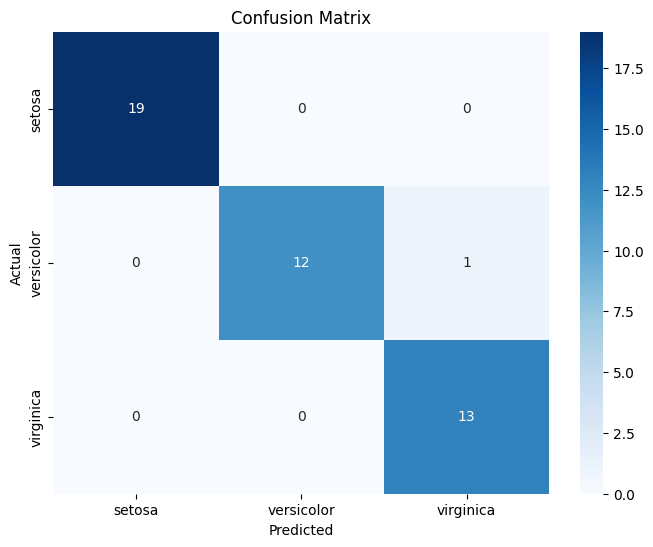

C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



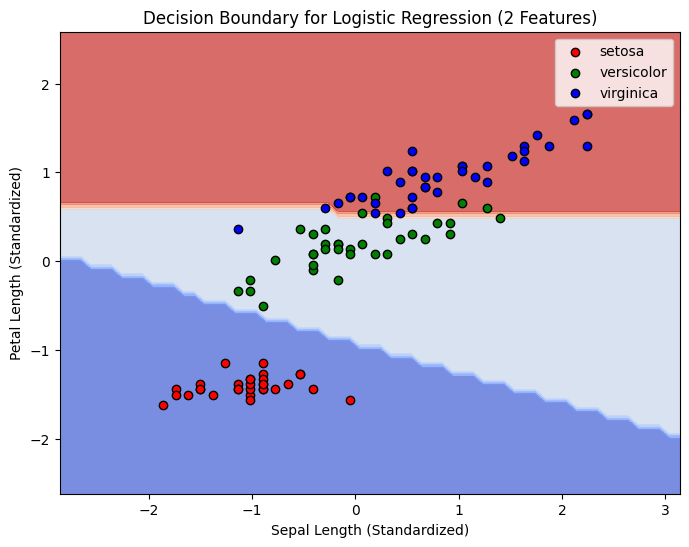

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load and prepare the data
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y = data.target  # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit multinomial logistic regression with regularization
model = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 1. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Plot Decision Boundaries (using only two features for simplicity)
# Select two features for visualization
X_vis = df[['sepal length (cm)', 'petal length (cm)']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vis)
X_test_scaled = scaler.transform(X_test_vis)

# Fit the logistic regression model
model_vis = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
model_vis.fit(X_train_scaled, y_train_vis)

# Create mesh grid for plotting decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels on the grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# Plot training points with class labels
colors = ['red', 'green', 'blue']
for i, color in zip(range(len(data.target_names)), colors):
    idx = np.where(y_train_vis == i)
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], c=color, edgecolor='k', label=data.target_names[i], marker='o')

plt.title('Decision Boundary for Logistic Regression (2 Features)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Petal Length (Standardized)')
plt.legend()
plt.show()


In [10]:
import numpy as np
import pandas as pd

# Create synthetic test data based on the range of the Iris dataset
np.random.seed(42)

# Number of test samples
n_samples = 10

# Generate random data for the features (approximate the Iris dataset feature ranges)
sepal_length = np.random.uniform(4.3, 7.9, n_samples)  # Range of sepal_length in Iris dataset
sepal_width = np.random.uniform(2.0, 4.4, n_samples)   # Range of sepal_width
petal_length = np.random.uniform(1.0, 6.9, n_samples)  # Range of petal_length
petal_width = np.random.uniform(0.1, 2.5, n_samples)   # Range of petal_width

# Generate random species (0, 1, or 2) for classification
species = np.random.choice([0, 1, 2], size=n_samples)

# Create a DataFrame
test_data = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width': sepal_width,
    'petal_length': petal_length,
    'petal_width': petal_width,
    'species': species
})

# Display the synthetic test data
print(test_data)


   sepal_length  sepal_width  petal_length  petal_width  species
0      5.648344     2.049403      4.609932     1.558108        2
1      7.722572     4.327784      1.823014     0.509258        0
2      6.935178     3.997862      2.723653     0.256124        2
3      6.455171     2.509614      3.161535     2.377325        2
4      4.861667     2.436380      3.690813     2.417517        1
5      4.861580     2.440171      5.632538     2.040154        0
6      4.509101     2.730181      2.178075     0.831073        1
7      7.418234     3.259415      4.033983     0.334413        1
8      6.464014     3.036668      4.495246     1.742159        1
9      6.849061     2.698950      1.274057     1.156366        1


Synthetic test data:
    sepal_length  sepal_width  petal_length  petal_width  species
0      5.648344     2.049403      4.609932     1.558108        2
1      7.722572     4.327784      1.823014     0.509258        0
2      6.935178     3.997862      2.723653     0.256124        2
3      6.455171     2.509614      3.161535     2.377325        2
4      4.861667     2.436380      3.690813     2.417517        1
5      4.861580     2.440171      5.632538     2.040154        0
6      4.509101     2.730181      2.178075     0.831073        1
7      7.418234     3.259415      4.033983     0.334413        1
8      6.464014     3.036668      4.495246     1.742159        1
9      6.849061     2.698950      1.274057     1.156366        1
         Current function value: 0.039662
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit  

c:\Users\cayde\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\cayde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


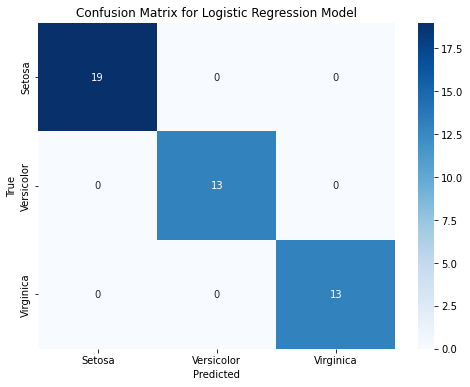


Feature Importance (Coefficients) from Logistic Regression Model:
        Feature  Coefficient
1   sepal_width     1.051428
0  sepal_length    -0.980389
3   petal_width    -1.604326
2  petal_length    -1.747783


In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assuming it's in the same structure as Iris dataset)
# Creating synthetic data
np.random.seed(42)

# Number of test samples
n_samples = 10


# Generate random data for the features (approximate the Iris dataset feature ranges)
sepal_length = np.random.uniform(4.3, 7.9, n_samples)
sepal_width = np.random.uniform(2.0, 4.4, n_samples)
petal_length = np.random.uniform(1.0, 6.9, n_samples)
petal_width = np.random.uniform(0.1, 2.5, n_samples)

# Generate random species (0, 1, or 2) for classification
species = np.random.choice([0, 1, 2], size=n_samples)

# Create a DataFrame
test_data = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width': sepal_width,
    'petal_length': petal_length,
    'petal_width': petal_width,
    'species': species
})

# Display the synthetic test data
print("Synthetic test data:\n", test_data)

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Keep the numeric labels for species

# Mapping target values to categorical labels (optional for display purposes)
df['species_label'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# Step 2: Train a multinomial logistic regression model using statsmodels
# Assuming your dataset has already been preprocessed
# df = pd.read_csv('iris.csv')  # Replace with actual dataset path if needed
df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)


from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

# Re-fit the model with the standardized features
model = smf.mnlogit('species ~ sepal_length + sepal_width + petal_length + petal_width', data=df)
result = model.fit()
print(result.summary())

# Fit the multinomial logistic regression model
# model = smf.mnlogit('species ~ sepal_length + sepal_width + petal_length + petal_width', data=df)

# # Train the model
# result = model.fit()

# # Print summary of the model
# print(result.summary())

# Step 3: Model Evaluation
# Create a LogisticRegression model for classification prediction

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = log_reg.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Step 5: Predicting on the synthetic test data
test_X = test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y_pred = log_reg.predict(test_X)

# Display the predictions for the synthetic test data
test_data['predicted_species'] = test_y_pred
print("\nPredictions on Synthetic Test Data:")
print(test_data)

# Step 6: Visualization of Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 7: Displaying feature importance from Logistic Regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance (Coefficients) from Logistic Regression Model:")
print(feature_importance)


### 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

Session link for Q4: https://chatgpt.com/share/67364201-02b0-8012-87a7-eda3ae815cfe

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        13:22:23   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While our calculated $R^2$ value is low (around 17%), this is not a contradiction with our observed low p-values. This is because fundamentally, $R^2$ captures the amount of variance explained by the model, whereas a low p-value indicates significant evidence against the null hypothesis that some factor has "no effect". When we have a low $R^2$ and low p-values, this simply means that the individual coefficient are statistically significant, BUT they do not capture ALL of the variance within the population (small effect but with high precision). There are other more dominant factors that were not included in the model that can explain away some of the additional variance. 